In [1]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import interp1d

# Length of period:
len_period = 4.2 # m

# Load data from output txt files:
# file = 'offset_particle_output/AllTracks_dp_neg_dxy_extended.txt'
file = 'offset_particle_output/AllTracks_dp_neg_dxy_extended2.txt'
data = np.loadtxt(file)

# Note particle offset for plot labels:
p_offset = 199.9 # MeV/c
# p_offset = 201 # MeV/c

# The same for the nominal particle:
# file_ref = 'offset_particle_output/AllTracks_nominal_extended.txt'
file_ref = 'offset_particle_output/AllTracks_nominal_extended2.txt'
data_ref = np.loadtxt(file_ref)
p_ref = 200 # MeV/c

# Figure directory:
fig_dir = 'Figures/'

In [2]:
# Values along channel -- for offset particle:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
next_z = 0.5; period_start_z_vals = []; period_start_indices = [] # start solenoid placement at 0.5m
p_perp_vals = []
for i in range(data.shape[0]):
    x_vals.append(data[i][0]*0.1) # mm -> cm
    y_vals.append(data[i][1]*0.1)
    z = data[i][2]*0.001 # mm -> m
    z_vals.append(z)
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    p_perp_vals.append(np.sqrt(px**2+py**2))
    t_vals.append(data[i][6]) # ns
    Bx_vals.append(data[i][12])
    By_vals.append(data[i][13])
    Bz_vals.append(data[i][14])

    # Find indices for first value in each period:
    if z > next_z:
        period_start_z_vals.append(z)
        period_start_indices.append(i)
        next_z += len_period

# Remove last period -- just for reducing end field effects:
start_last_period = period_start_indices[len(period_start_indices)-1]
x_vals = x_vals[:start_last_period]
y_vals = y_vals[:start_last_period]
z_vals = z_vals[:start_last_period]
px_vals = px_vals[:start_last_period]
py_vals = py_vals[:start_last_period]
pz_vals = pz_vals[:start_last_period]
p_perp_vals = p_perp_vals[:start_last_period]
t_vals = t_vals[:start_last_period]
Bx_vals = Bx_vals[:start_last_period]
By_vals = By_vals[:start_last_period]
Bz_vals = Bz_vals[:start_last_period]

In [3]:
# Values along channel -- for reference particle:
x_vals_ref = []; y_vals_ref = []; z_vals_ref = []
px_vals_ref = []; py_vals_ref = []; pz_vals_ref = []; ptotal_vals_ref = []
t_vals_ref = []
Bx_vals_ref = []; By_vals_ref = []; Bz_vals_ref = []
p_perp_vals_ref = []
for i in range(data_ref.shape[0]):
    x_vals_ref.append(data_ref[i][0]*0.1) # mm -> cm
    y_vals_ref.append(data_ref[i][1]*0.1)
    z_ref = data_ref[i][2]*0.001 # mm -> m
    z_vals_ref.append(z_ref)
    px_ref = data_ref[i][3]; py_ref = data_ref[i][4]; pz_ref = data_ref[i][5]
    px_vals_ref.append(px_ref) # MeV/c
    py_vals_ref.append(py_ref)
    pz_vals_ref.append(pz_ref)
    ptotal_vals_ref.append(np.sqrt(px_ref**2+py_ref**2+pz_ref**2))
    p_perp_vals_ref.append(np.sqrt(px_ref**2+py_ref**2))
    t_vals_ref.append(data_ref[i][6]) # ns
    Bx_vals_ref.append(data_ref[i][12])
    By_vals_ref.append(data_ref[i][13])
    Bz_vals_ref.append(data_ref[i][14])

# Remove last period -- just for reducing end field effects:
start_last_period = period_start_indices[len(period_start_indices)-1]
x_vals_ref = x_vals_ref[:start_last_period]
y_vals_ref = y_vals_ref[:start_last_period]
z_vals_ref = z_vals_ref[:start_last_period]
px_vals_ref = px_vals_ref[:start_last_period]
py_vals_ref = py_vals_ref[:start_last_period]
pz_vals_ref = pz_vals_ref[:start_last_period]
p_perp_vals_ref = p_perp_vals_ref[:start_last_period]
t_vals_ref = t_vals_ref[:start_last_period]
Bx_vals_ref = Bx_vals_ref[:start_last_period]
By_vals_ref = By_vals_ref[:start_last_period]
Bz_vals_ref = Bz_vals_ref[:start_last_period]

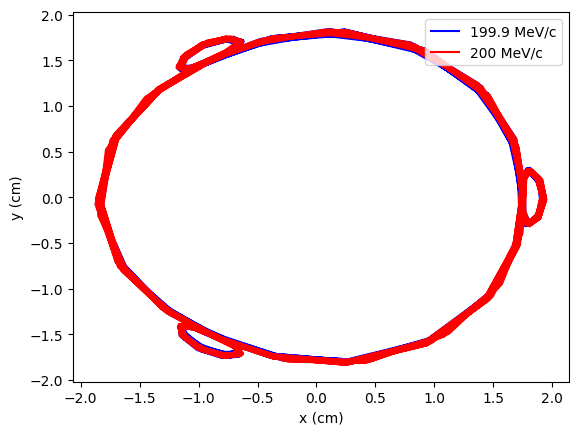

In [4]:
# Plot projection in x-y plane:
plt.figure()
plt.plot(x_vals,y_vals,color='blue',label=f'{p_offset} MeV/c')
plt.plot(x_vals_ref,y_vals_ref,color='red',label=f'{p_ref} MeV/c')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.legend(loc='upper right')
plt.show()

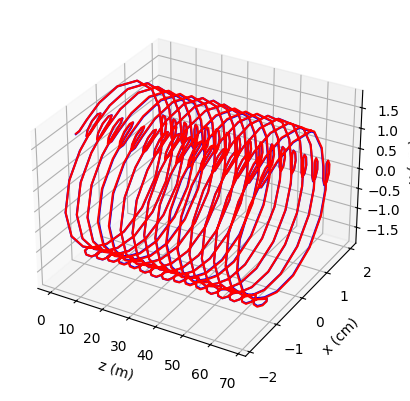

In [5]:
# 3D plot of trajectory:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_vals,x_vals,y_vals,color='blue',label=f'{p_offset} MeV/c')
ax.plot(z_vals_ref,x_vals_ref,y_vals_ref,color='red',label='200 MeV/c')
ax.set_xlabel('z (m)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')
plt.show()

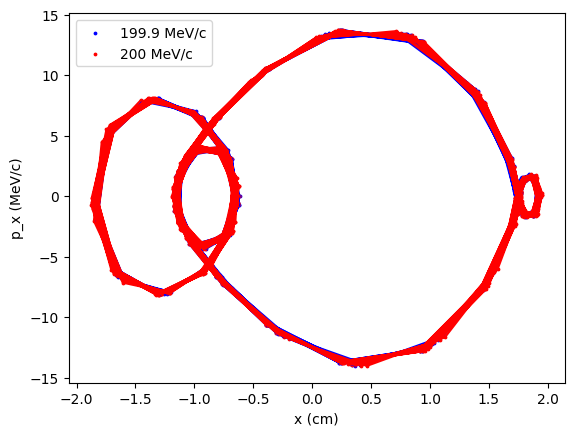

In [6]:
# Plot phase space trajectory (x):
plt.figure()
plt.scatter(x_vals,px_vals,s=3,color='blue',label=f'{p_offset} MeV/c')
plt.plot(x_vals,px_vals,color='blue')
plt.scatter(x_vals_ref,px_vals_ref,s=3,color='red',label=f'{p_ref} MeV/c')
plt.plot(x_vals_ref,px_vals_ref,color='red')
plt.xlabel('x (cm)')
plt.ylabel('p_x (MeV/c)')
plt.legend(loc='upper left')
plt.show()

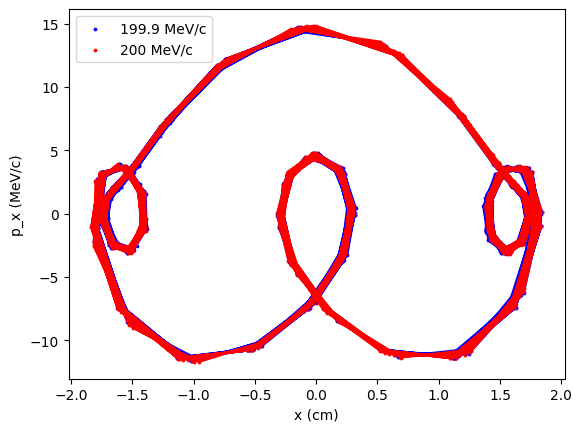

In [7]:
# Plot phase space trajectory (y):
plt.figure()
plt.scatter(y_vals,py_vals,s=3,color='blue',label=f'{p_offset} MeV/c')
plt.plot(y_vals,py_vals,color='blue')
plt.scatter(y_vals_ref,py_vals_ref,s=3,color='red',label=f'{p_ref} MeV/c')
plt.plot(y_vals_ref,py_vals_ref,color='red')
plt.xlabel('x (cm)')
plt.ylabel('p_x (MeV/c)')
plt.legend(loc='upper left')
plt.show()

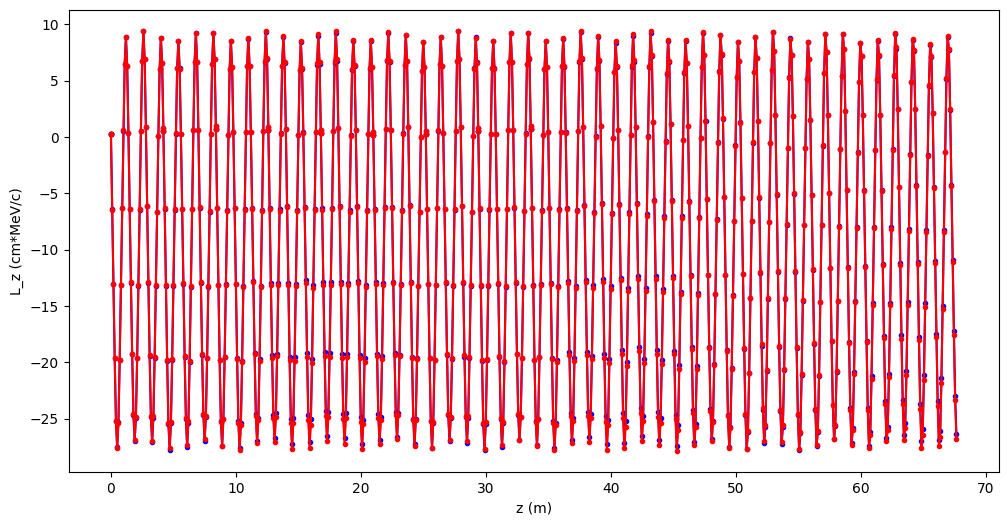

In [8]:
# Plot angular momentum:
# %matplotlib widget
Lz_vals = []; Lz_vals_ref = []
for i in range(len(z_vals)):
    Lz = x_vals[i]*py_vals[i]-y_vals[i]*px_vals[i]
    Lz_vals.append(Lz)
    Lz_ref = x_vals_ref[i]*py_vals_ref[i]-y_vals_ref[i]*px_vals_ref[i]
    Lz_vals_ref.append(Lz_ref)
plt.figure(figsize = (12,6))
plt.plot(z_vals,Lz_vals,marker='.',color='blue',label=f'{p_offset} MeV/c')
plt.plot(z_vals_ref,Lz_vals_ref,marker='.',color='red',label=f'{p_ref} MeV/c')
plt.xlabel('z (m)')
plt.ylabel('L_z (cm*MeV/c)')
plt.show()

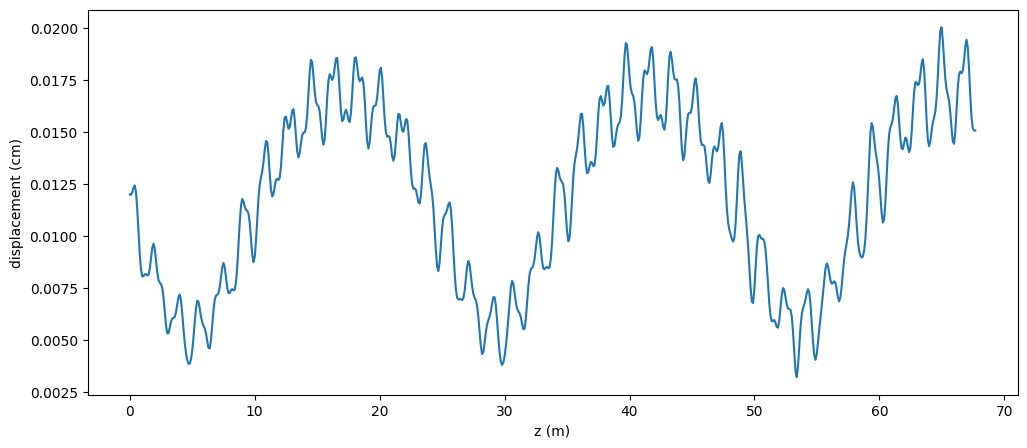

In [9]:
# Plot displacement from reference particle along channel:
displacements = []
for i in range(len(x_vals)):
    displacements.append(np.sqrt( (x_vals_ref[i] - x_vals[i])**2 + (y_vals_ref[i] - y_vals[i])**2 ))
plt.figure(figsize=(12,5))
plt.plot(z_vals,displacements)
plt.xlabel('z (m)')
plt.ylabel('displacement (cm)')
plt.show()

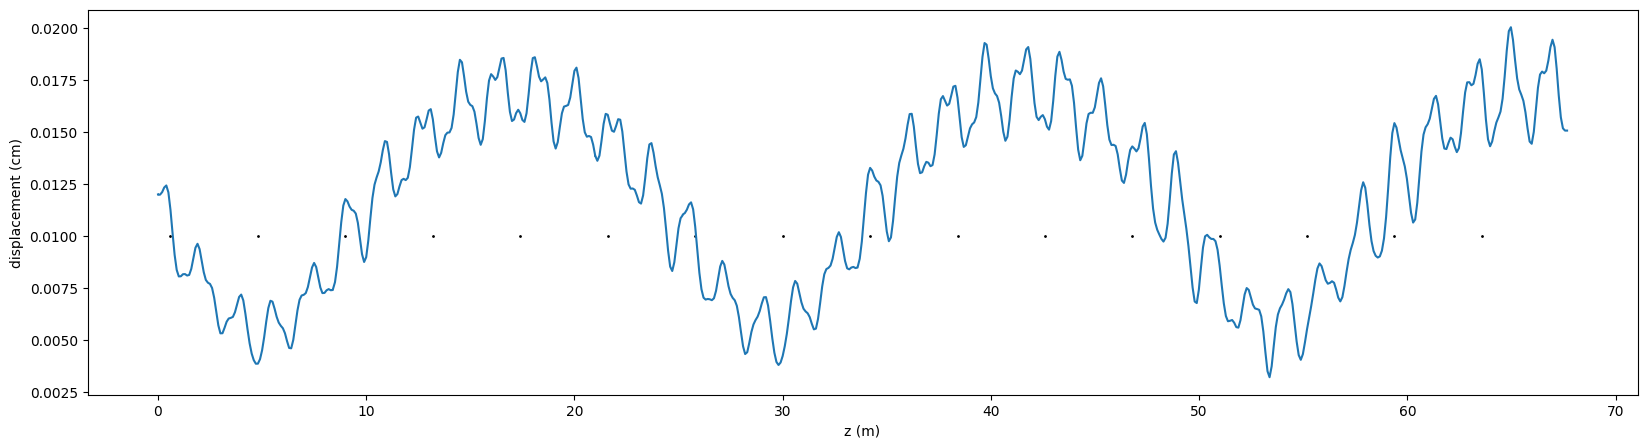

In [10]:
# Plot displacement from reference particle along channel -- with marks denoting start of periods:
period_marker = []
for i in range(len(z_vals)):
    if z_vals[i] in period_start_z_vals:
        period_marker.append(0.01)
    else:
        period_marker.append(np.nan)
displacements = []
for i in range(len(x_vals)):
    displacements.append(np.sqrt( (x_vals_ref[i] - x_vals[i])**2 + (y_vals_ref[i] - y_vals[i])**2 ))
plt.figure(figsize=(20,5))
plt.plot(z_vals,displacements)
plt.scatter(z_vals,period_marker,s=1,color='black')
plt.xlabel('z (m)')
plt.ylabel('displacement (cm)')
plt.show()

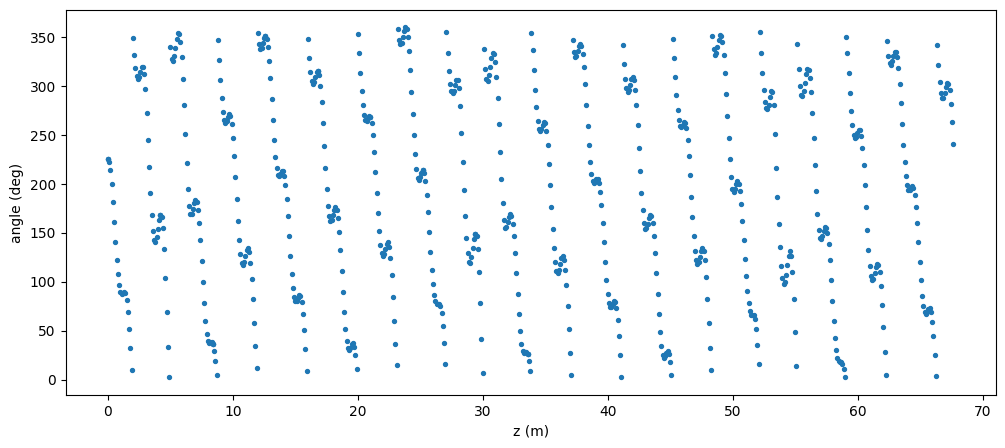

In [11]:
# Plot angle w.r.t. reference particle along channel:
angles = []
for i in range(len(x_vals)):
    x = x_vals_ref[i] - x_vals[i]
    y = y_vals_ref[i] - y_vals[i]
    angle = np.degrees(np.arctan2(-y,-x))
    if angle < 0:
        angle += 360
    angles.append(angle)
plt.figure(figsize=(12,5))
plt.scatter(z_vals,angles,s=8)
plt.xlabel('z (m)')
plt.ylabel('angle (deg)')
plt.show()

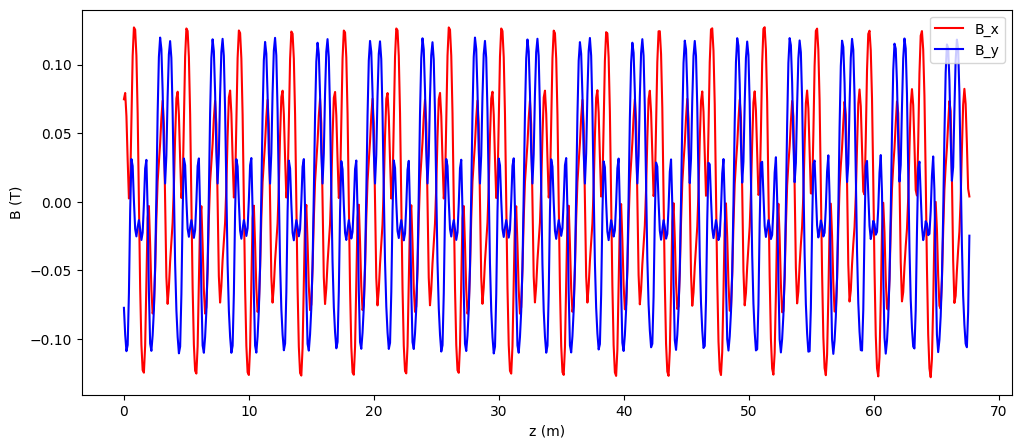

In [12]:
# Plot B field along channel:
plt.figure(figsize=(12,5))
plt.plot(z_vals,Bx_vals,color='red',label='B_x')
plt.plot(z_vals,By_vals,color='blue',label='B_y')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

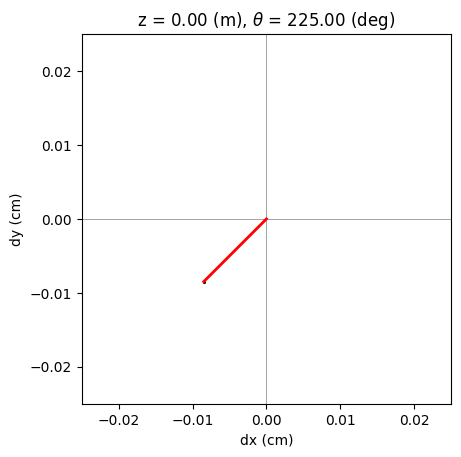

In [13]:
# Animate displacement vector:
dx = []; dy = []
for i in range(len(x_vals)):
    dx.append(x_vals[i] - x_vals_ref[i])
    dy.append(y_vals[i] - y_vals_ref[i])
fig, ax = plt.subplots()
ax.set_aspect('equal')
# ax.set_xlim(-0.25, 0.25)
# ax.set_ylim(-0.25, 0.25)
ax.set_xlim(-0.025, 0.025)
ax.set_ylim(-0.025, 0.025)
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.set_xlabel('dx (cm)')
ax.set_ylabel('dy (cm)')
line, = ax.plot([], [], 'r-', lw=2)
def animate(frame):
    line.set_data([0, dx[frame]], [0, dy[frame]])
    plt.scatter(dx[frame],dy[frame],color='black',s=1)
    ax.set_title(f'z = {z_vals[frame]:.2f} (m), $\\theta$ = {angles[frame]:.2f} (deg)')
    return line,
animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, blit=True)
# animation.save(fig_dir+'displacement_vector_dp.gif', writer='pillow')

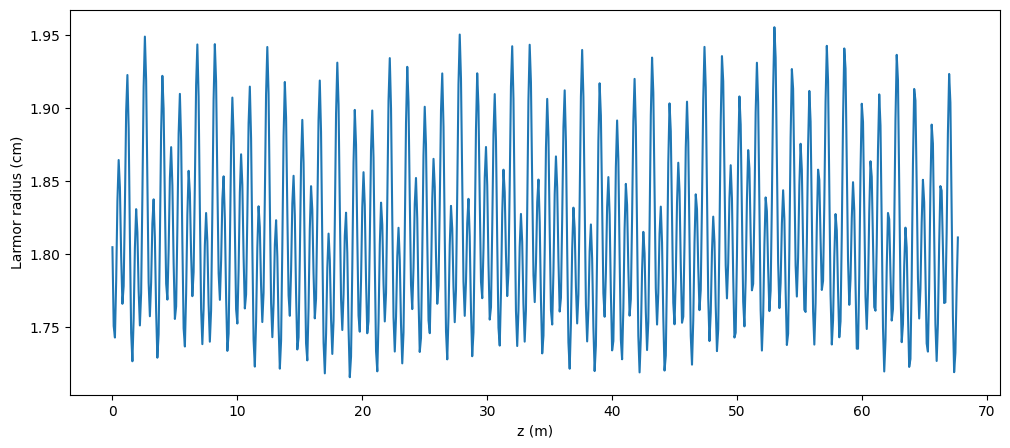

In [14]:
# Compute Larmor radius -- plot for offset particle:
r = []; r_ref = []
for i in range(len(z_vals)):
    r.append(np.sqrt( (x_vals[i])**2 + (y_vals[i])**2))
    r_ref.append(np.sqrt( (x_vals_ref[i])**2 + (y_vals_ref[i])**2))
plt.figure(figsize=(12,5))
plt.plot(z_vals,r)
plt.xlabel('z (m)')
plt.ylabel('Larmor radius (cm)')
plt.show()

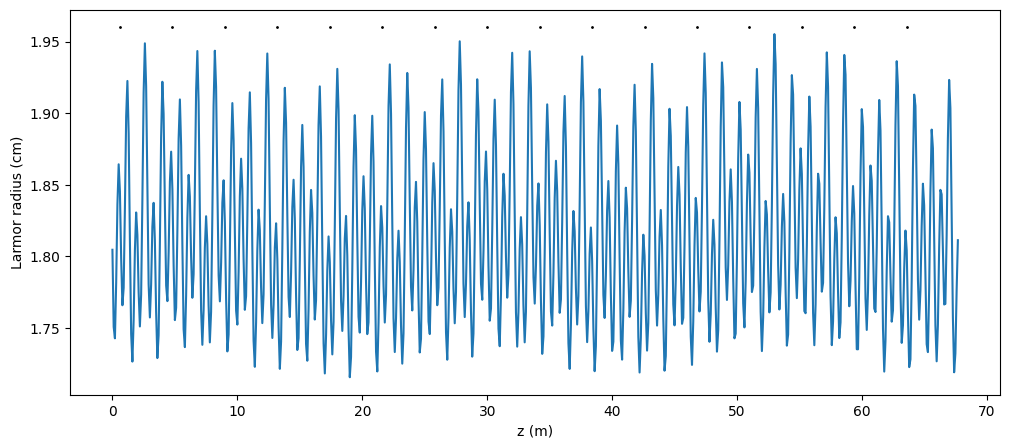

In [15]:
# Compute Larmor radius -- plot for offset particle + with marks denoting start of periods:
period_marker = []
for i in range(len(z_vals)):
    if z_vals[i] in period_start_z_vals:
        period_marker.append(1.96)
    else:
        period_marker.append(np.nan)
plt.figure(figsize=(12,5))
plt.plot(z_vals,r)
plt.scatter(z_vals,period_marker,s=1,color='black')
plt.xlabel('z (m)')
plt.ylabel('Larmor radius (cm)')
plt.show()

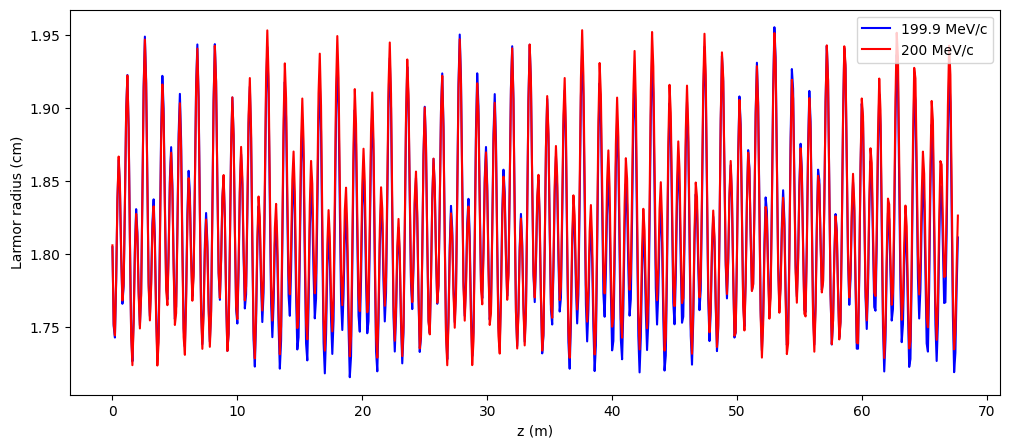

In [16]:
# Compute Larmor radius -- compare offset to nominal:
r = []; r_ref = []
for i in range(len(z_vals)):
    r.append(np.sqrt( (x_vals[i])**2 + (y_vals[i])**2))
    r_ref.append(np.sqrt( (x_vals_ref[i])**2 + (y_vals_ref[i])**2))
plt.figure(figsize=(12,5))
plt.plot(z_vals,r,label=f'{p_offset} MeV/c',color='blue')
plt.plot(z_vals,r_ref,label=f'{p_ref} MeV/c',color='red')
plt.xlabel('z (m)')
plt.ylabel('Larmor radius (cm)')
plt.legend()
plt.show()

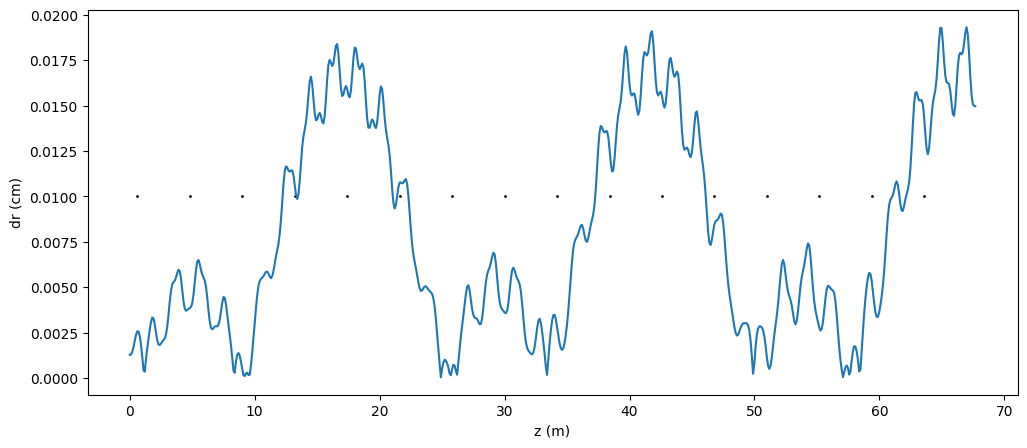

In [17]:
# Compute deviation in Larmor radius:
dr = []
period_marker = []
for i in range(len(z_vals)):
    dr.append(abs(r_ref[i]-r[i]))
    if z_vals[i] in period_start_z_vals:
        period_marker.append(0.01)
    else:
        period_marker.append(np.nan)
plt.figure(figsize=(12,5))
plt.scatter(z_vals,period_marker,s=1,color='black')
plt.plot(z_vals,dr)
plt.xlabel('z (m)')
plt.ylabel('dr (cm)')
plt.show()

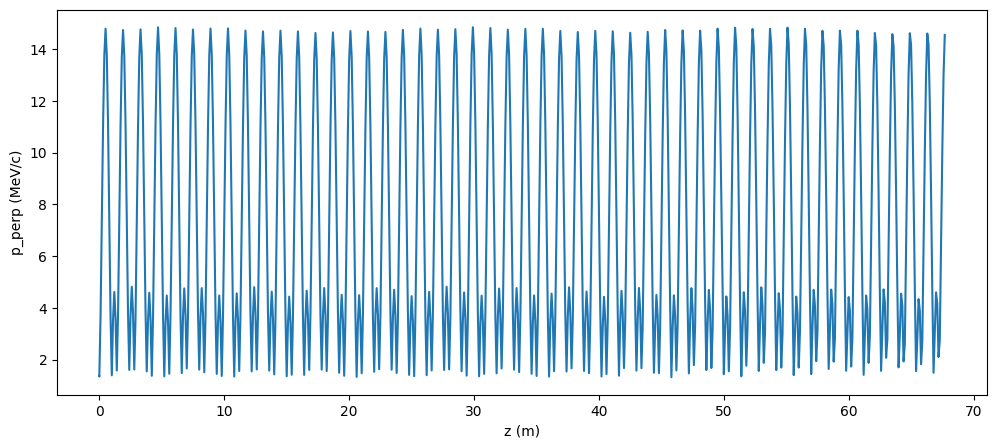

In [18]:
# Plot p_perp along the channel:
plt.figure(figsize=(12,5))
plt.plot(z_vals,p_perp_vals)
plt.xlabel('z (m)')
plt.ylabel('p_perp (MeV/c)')
plt.show()

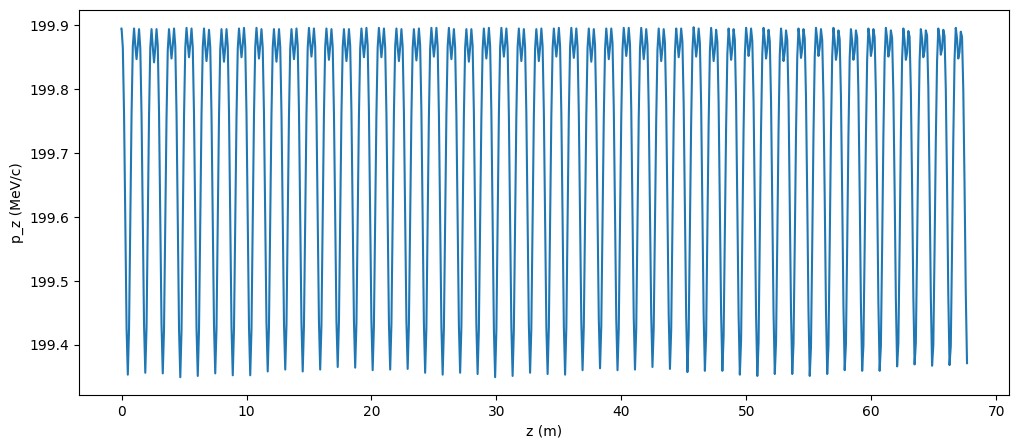

In [19]:
# Plot p_z along the channel:
plt.figure(figsize=(12,5))
plt.plot(z_vals,pz_vals)
plt.xlabel('z (m)')
plt.ylabel('p_z (MeV/c)')
plt.show()

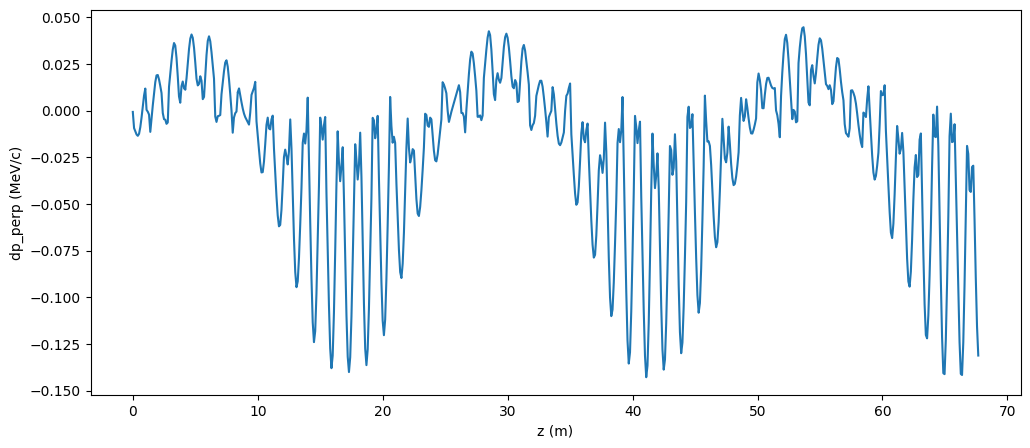

In [20]:
# Plot difference between offset and nominal p_perp along channel:
dp_perp = []
for i in range(len(z_vals)):
    dp_perp.append(p_perp_vals[i]- p_perp_vals_ref[i])
plt.figure(figsize=(12,5))
plt.plot(z_vals,dp_perp)
plt.xlabel('z (m)')
plt.ylabel('dp_perp (MeV/c)')
plt.show()

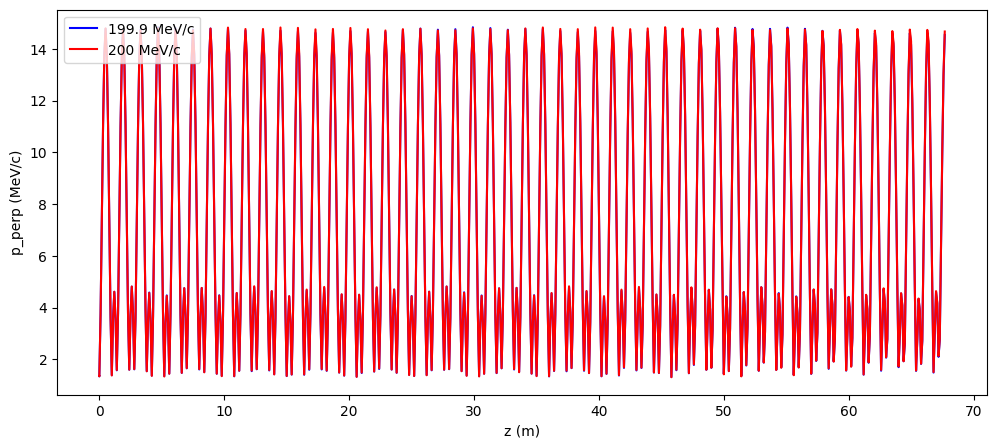

In [21]:
# Plot both offset and nominal p_perp along channel:
plt.figure(figsize=(12,5))
plt.plot(z_vals,p_perp_vals,label=f'{p_offset} MeV/c',color='blue')
plt.plot(z_vals,p_perp_vals_ref,label=f'{p_ref} MeV/c',color='red')
plt.xlabel('z (m)')
plt.ylabel('p_perp (MeV/c)')
plt.legend(loc='upper left')
plt.show()

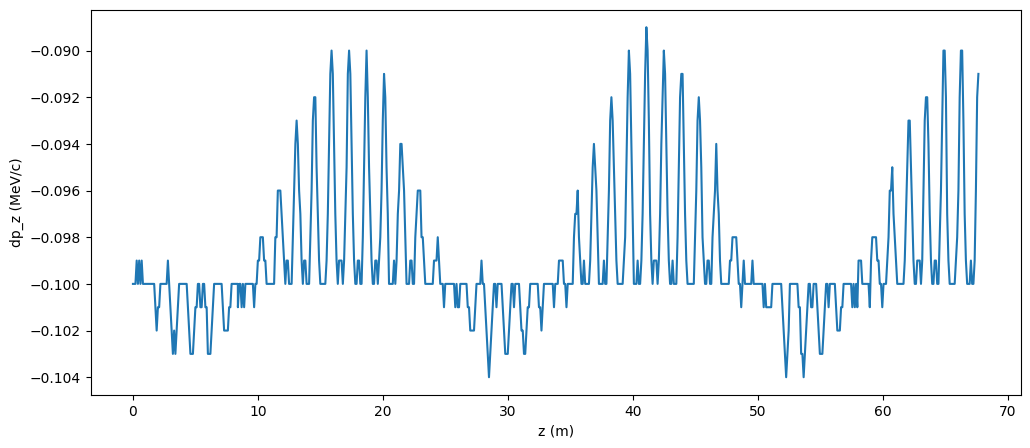

In [22]:
# Plot difference between offset and nominal p_z along channel:
dpz = []
for i in range(len(z_vals)):
    dpz.append(pz_vals[i]- pz_vals_ref[i])
plt.figure(figsize=(12,5))
plt.plot(z_vals,dpz)
plt.xlabel('z (m)')
plt.ylabel('dp_z (MeV/c)')
plt.show()

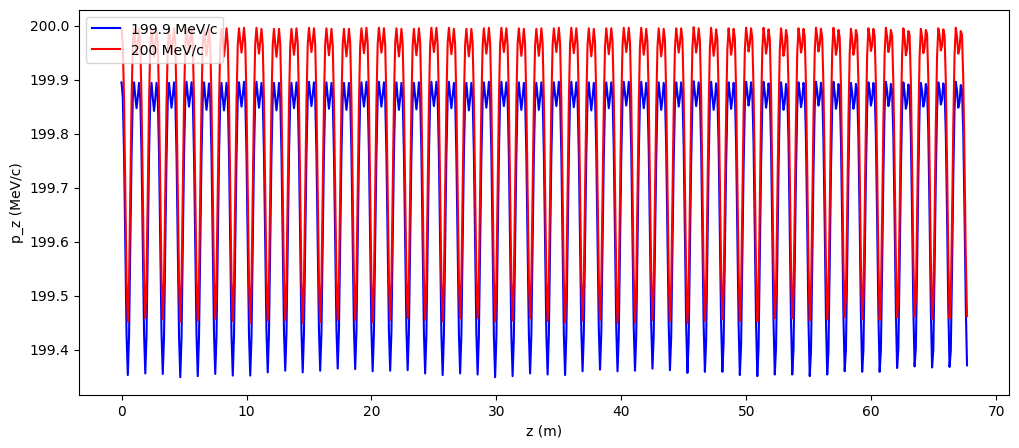

In [23]:
# Plot both offset and nominal p_perp along channel:
plt.figure(figsize=(12,5))
plt.plot(z_vals,pz_vals,label=f'{p_offset} MeV/c',color='blue')
plt.plot(z_vals,pz_vals_ref,label=f'{p_ref} MeV/c',color='red')
plt.xlabel('z (m)')
plt.ylabel('p_z (MeV/c)')
plt.legend(loc='upper left')
plt.show()

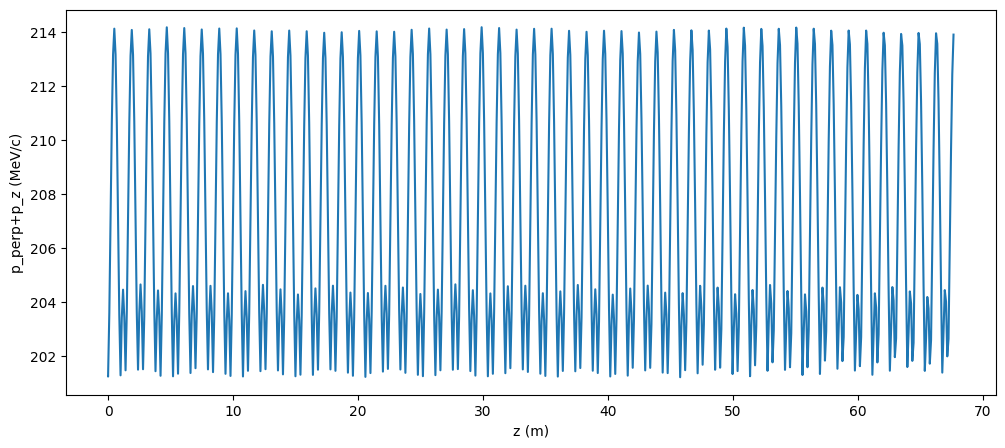

In [24]:
# Plot sum of p_perp and p_z along channel:
p_sum_vals = []
for i in range(len(z_vals)):
    p_sum_vals.append(p_perp_vals[i]+pz_vals[i])
plt.figure(figsize=(12,5))
plt.plot(z_vals,p_sum_vals)
plt.xlabel('z (m)')
plt.ylabel('p_perp+p_z (MeV/c)')
plt.show()

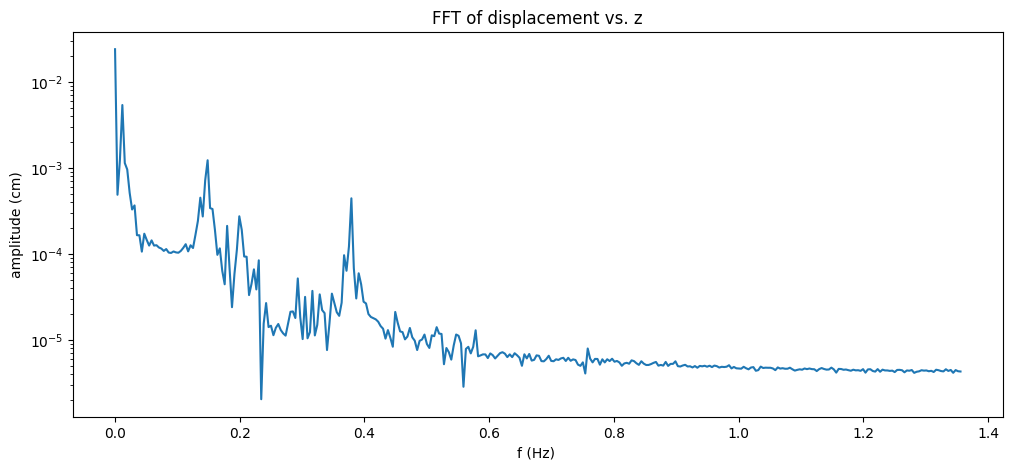

In [25]:
##### FFT displacements in time basis #####

# Evenly space z values:
t_uniform = np.linspace(np.min(t_vals), np.max(t_vals), len(t_vals))
displacements_interp_func = interp1d(t_vals, displacements)
displacements_uniform = displacements_interp_func(t_uniform)

# Perform FFT:
fft = np.fft.fft(displacements_uniform)
dt = t_uniform[1] - t_uniform[0]
N = len(t_uniform)
freqs = np.fft.fftfreq(N, d=dt)

# Normalize amplitudes:
amplitude = 2 * np.abs(fft) / N

# Only take positive wave numbers:
half_N = N // 2
positive_freqs = freqs[:half_N]
positive_amplitude = amplitude[:half_N]

# Plot FFT:
plt.figure(figsize=(12, 5))
plt.plot(positive_freqs, positive_amplitude)
plt.yscale('log')
plt.xlabel('f (Hz) ')
plt.ylabel('amplitude (cm)')
plt.title('FFT of displacement vs. z')
plt.show()

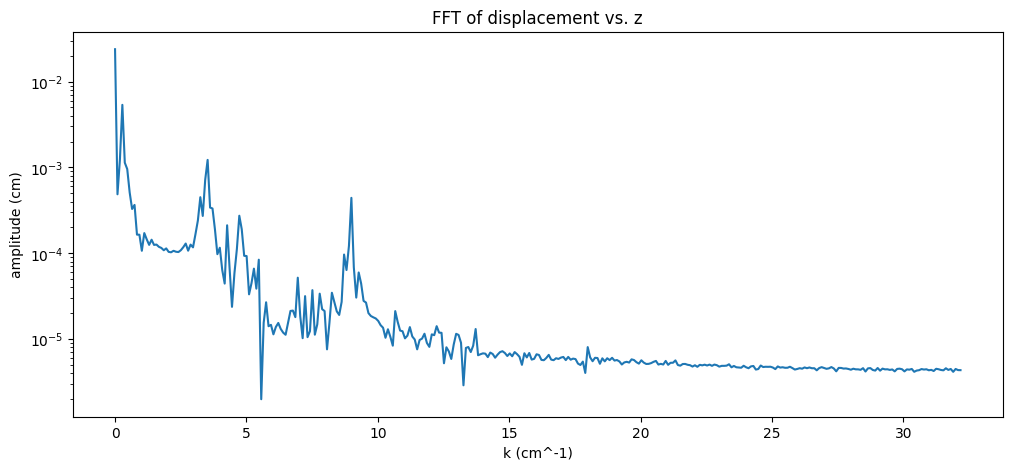

In [26]:
##### FFT displacements in position basis #####

# Evenly space z values:
z_uniform = np.linspace(np.min(z_vals), np.max(z_vals), len(z_vals))
displacements_interp_func = interp1d(z_vals, displacements)
displacements_uniform = displacements_interp_func(z_uniform)

# Perform FFT:
fft = np.fft.fft(displacements_uniform)
dz = z_uniform[1] - z_uniform[0]
N = len(z_uniform)

# Units conversion:
k_cyclic = np.fft.fftfreq(N, d=dz)  # cycles/cm
k_radians = 2 * np.pi * k_cyclic    # radians/cm

# Normalize amplitudes:
amplitude = 2 * np.abs(fft) / N

# Only take positive wave numbers:
half_N = N // 2
positive_k = k_radians[:half_N]
positive_amplitude = amplitude[:half_N]

# Plot FFT:
# %matplotlib widget
plt.figure(figsize=(12, 5))
plt.plot(positive_k, positive_amplitude)
plt.yscale('log')
plt.xlabel('k (cm^-1)')
plt.ylabel('amplitude (cm)')
plt.title('FFT of displacement vs. z')
plt.show()

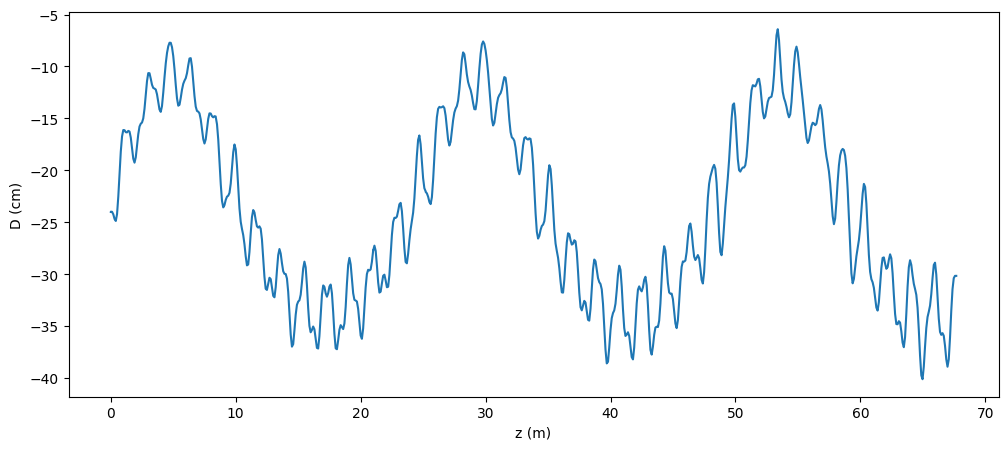

In [27]:
# Plot dispersion:
dp_p = (p_offset-p_ref)/p_ref # <-- or should this be /p_offset?
D = []
for i in range(len(z_vals)):
    D.append(displacements[i]/dp_p)
plt.figure(figsize=(12,5))
plt.plot(z_vals,D)
plt.ylabel('D (cm)')
plt.xlabel('z (m)')
plt.show()

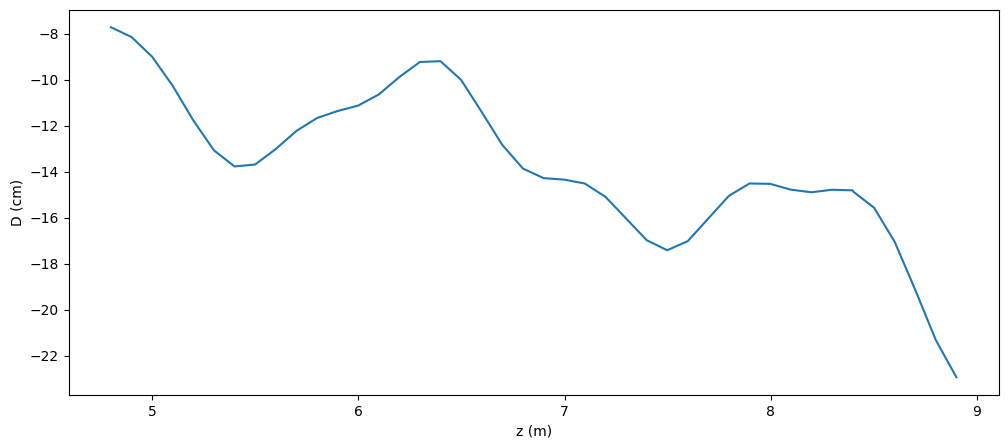

In [28]:
# Plot dispersion for second period only:
plt.figure(figsize=(12,5))
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],D[period_start_indices[1]:period_start_indices[2]])
plt.ylabel('D (cm)')
plt.xlabel('z (m)')
plt.show()

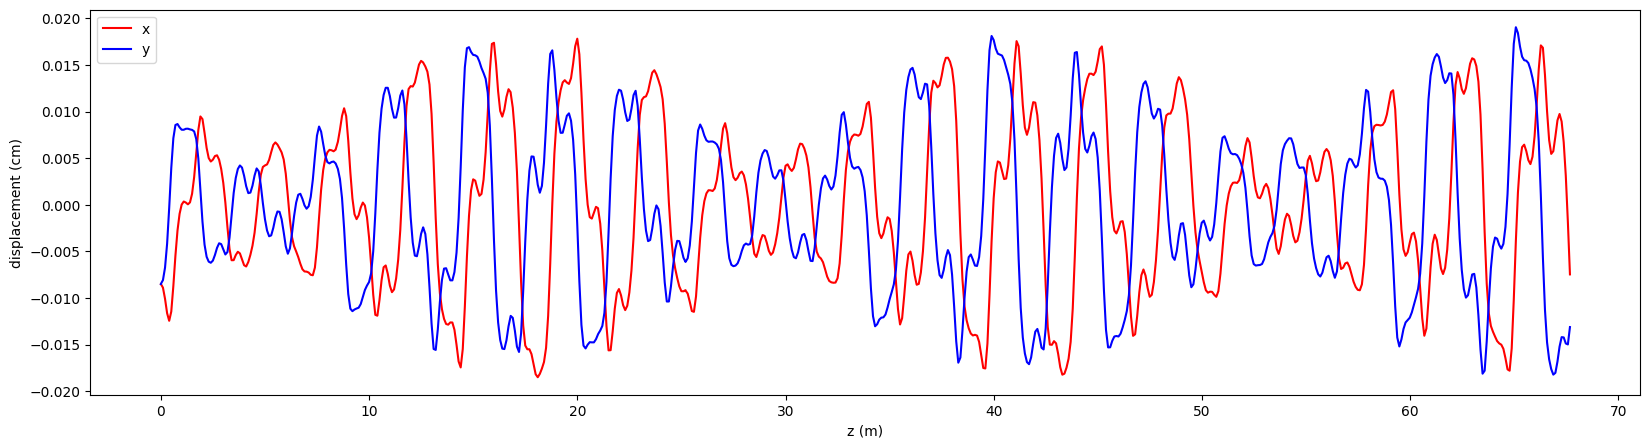

In [29]:
# Plot x,y displacement from reference particle along channel:
x_disp = []
y_disp = []
for i in range(len(z_vals)):
    x_disp.append((x_vals[i] - x_vals_ref[i]))
    y_disp.append((y_vals[i] - y_vals_ref[i]))
plt.figure(figsize=(20,5))
plt.plot(z_vals,x_disp,color='red',label='x')
plt.plot(z_vals,y_disp,color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('displacement (cm)')
plt.legend(loc='upper left')
plt.show()

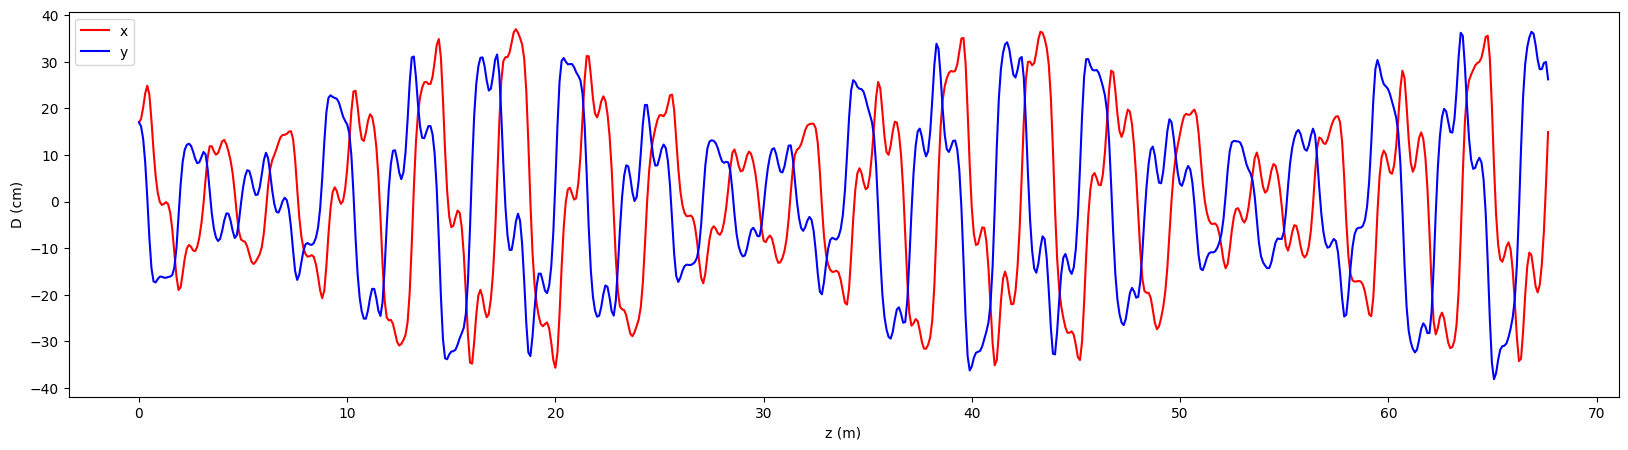

In [30]:
# Plot x,y dispersion from reference particle along channel:
D_x = []
D_y = []
for i in range(len(z_vals)):
    D_x.append(x_disp[i]/dp_p)
    D_y.append(y_disp[i]/dp_p)
plt.figure(figsize=(20,5))
plt.plot(z_vals,D_x,color='red',label='x')
plt.plot(z_vals,D_y,color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('D (cm)')
plt.legend(loc='upper left')
plt.show()

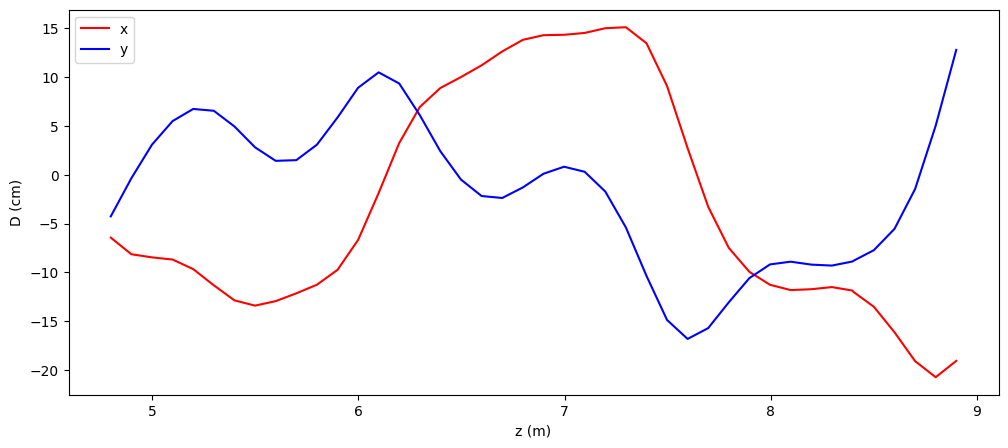

In [31]:
# Plot x,y dispersion for second period only:
plt.figure(figsize=(12,5))
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],D_x[period_start_indices[1]:period_start_indices[2]],color='red',label='x')
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],D_y[period_start_indices[1]:period_start_indices[2]],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('D (cm)')
plt.legend(loc='upper left')
plt.show()

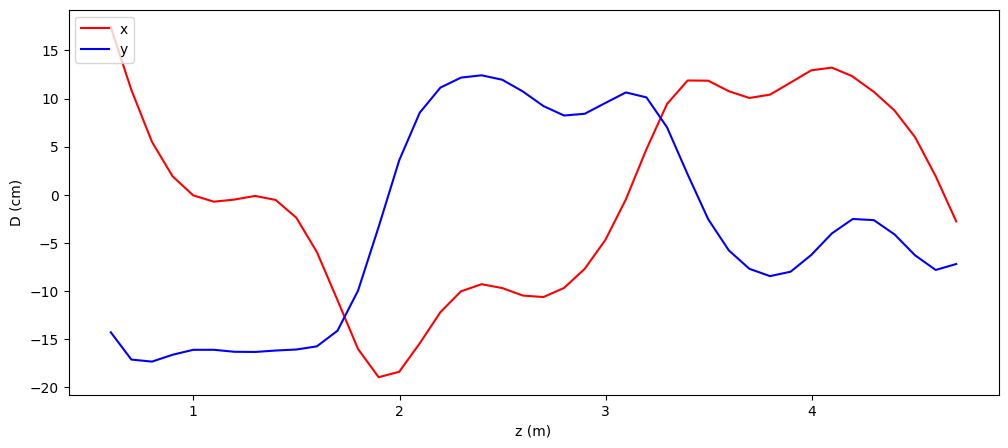

In [32]:
# Plot x,y dispersion for first period only:
plt.figure(figsize=(12,5))
plt.plot(z_vals[period_start_indices[0]:period_start_indices[1]],D_x[period_start_indices[0]:period_start_indices[1]],color='red',label='x')
plt.plot(z_vals[period_start_indices[0]:period_start_indices[1]],D_y[period_start_indices[0]:period_start_indices[1]],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('D (cm)')
plt.legend(loc='upper left')
plt.show()

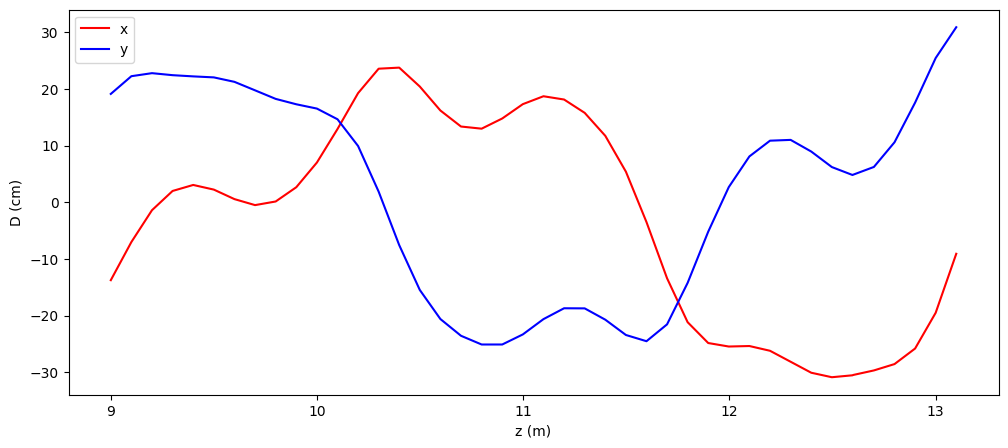

In [33]:
# Plot x,y dispersion for third period only:
plt.figure(figsize=(12,5))
plt.plot(z_vals[period_start_indices[2]:period_start_indices[3]],D_x[period_start_indices[2]:period_start_indices[3]],color='red',label='x')
plt.plot(z_vals[period_start_indices[2]:period_start_indices[3]],D_y[period_start_indices[2]:period_start_indices[3]],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('D (cm)')
plt.legend(loc='upper left')
plt.show()

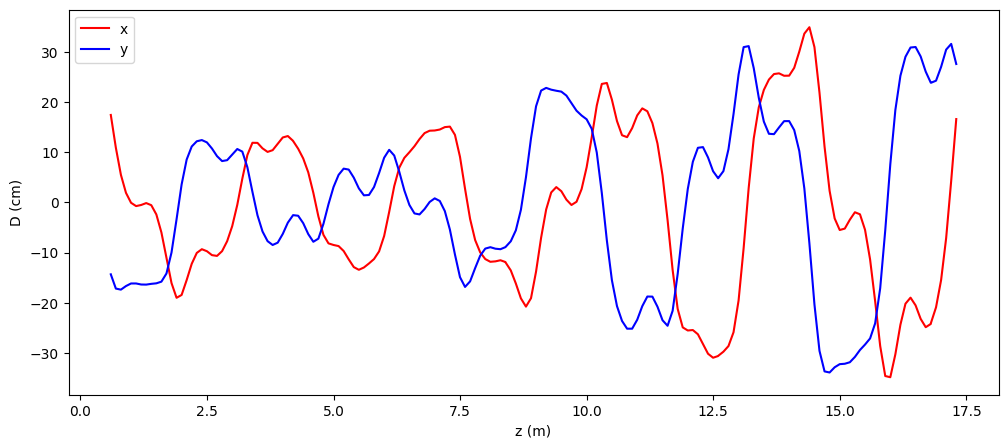

In [34]:
# Plot x,y dispersion for first four periods:
plt.figure(figsize=(12,5))
plt.plot(z_vals[period_start_indices[0]:period_start_indices[4]],D_x[period_start_indices[0]:period_start_indices[4]],color='red',label='x')
plt.plot(z_vals[period_start_indices[0]:period_start_indices[4]],D_y[period_start_indices[0]:period_start_indices[4]],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('D (cm)')
plt.legend(loc='upper left')
plt.show()